In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
def clean_cols(cols):
    return [col.lower() for col in cols]

In [12]:
file_path = "../datasets/Pokemon.csv"

df = pd.read_csv(file_path)
df.columns = clean_cols(df.columns)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   name        800 non-null    object
 2   type 1      800 non-null    object
 3   type 2      414 non-null    object
 4   total       800 non-null    int64 
 5   hp          800 non-null    int64 
 6   attack      800 non-null    int64 
 7   defense     800 non-null    int64 
 8   sp. atk     800 non-null    int64 
 9   sp. def     800 non-null    int64 
 10  speed       800 non-null    int64 
 11  generation  800 non-null    int64 
 12  legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


As we had guessed, there is quite a significant class imbalance in the dataset. Less than 10% of the Pokemon are legendary.

In [30]:
print("-- pct")
print(df.legendary.value_counts(normalize=True))
print("-- counts")
print(df.legendary.value_counts())


-- pct
False    0.91875
True     0.08125
Name: legendary, dtype: float64
-- counts
False    735
True      65
Name: legendary, dtype: int64


array([[<AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'sp. atk'}>],
       [<AxesSubplot:title={'center':'sp. def'}>,
        <AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

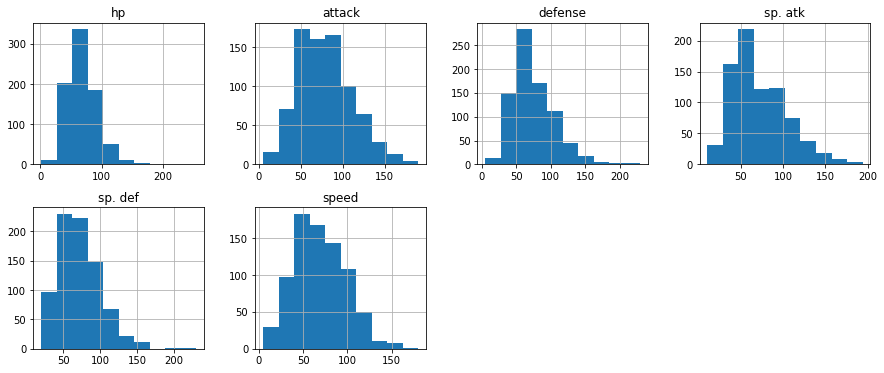

In [22]:
numerical = ['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']
df[numerical].hist(figsize=(15,6), layout=(2,4))

[Text(0.5, 1.0, 'total stats by Pokemon generation')]

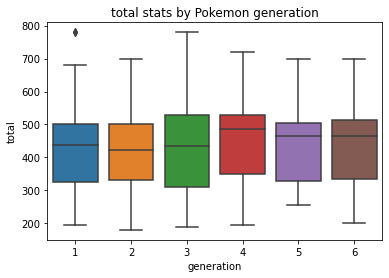

In [24]:
sns.boxplot(x=df.generation, y=df.total).set(title="total stats by Pokemon generation")

[Text(0.5, 1.0, 'total stats by Pokemon generation - no legendaries')]

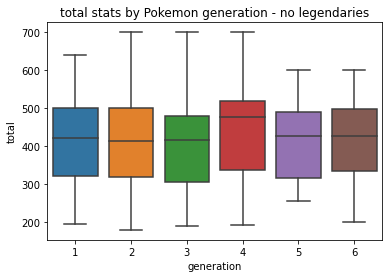

In [27]:
no_legendary_df = df[df.legendary==False]
(sns.boxplot(
    x=no_legendary_df.generation,
    y=no_legendary_df.total)
    .set(title="total stats by Pokemon generation - no legendaries"))


Beause we have class imbalance, the following performance measures should be considered when evaluating our model:
- Confusion matrix
- Precision (exactness)
- Recall (completeness)
- F-score (weighted average of precision and recall)
- ROC curves (sensitivity and specificity)
- Kappa (or Cohen's kappa)